In [1]:
from maskr.ipstartup import *
from maskr.samples.nuke.learner import *
from maskr.utils import visualize
from maskr.samples.nuke.config import Config
from maskr.test.baseline import rngreset

class Config(Config):
    SHUFFLE=False
    GPU_COUNT=1
config = Config()
rngreset()

[root:INFO]: (ipstartup.py:34, time=00:08)


In [2]:
data = get_data(config)
model = MaskRCNN(config=config)
model.load_state_dict(torch.load("models/nukemodel.pth"))

[root:INFO]:starting (cellevents.py:36, time=00:08)
[root:INFO]:train    505
valid    123
Name: subset, dtype: int64 (learner.py:22, time=00:08)


time: 51.7 s


In [3]:
images = [data.train_ds.load_image(255)]
results = model.predict(images)

[root:INFO]:starting (cellevents.py:36, time=00:09)


time: 10.8 s


[root:INFO]:starting (cellevents.py:36, time=00:09)


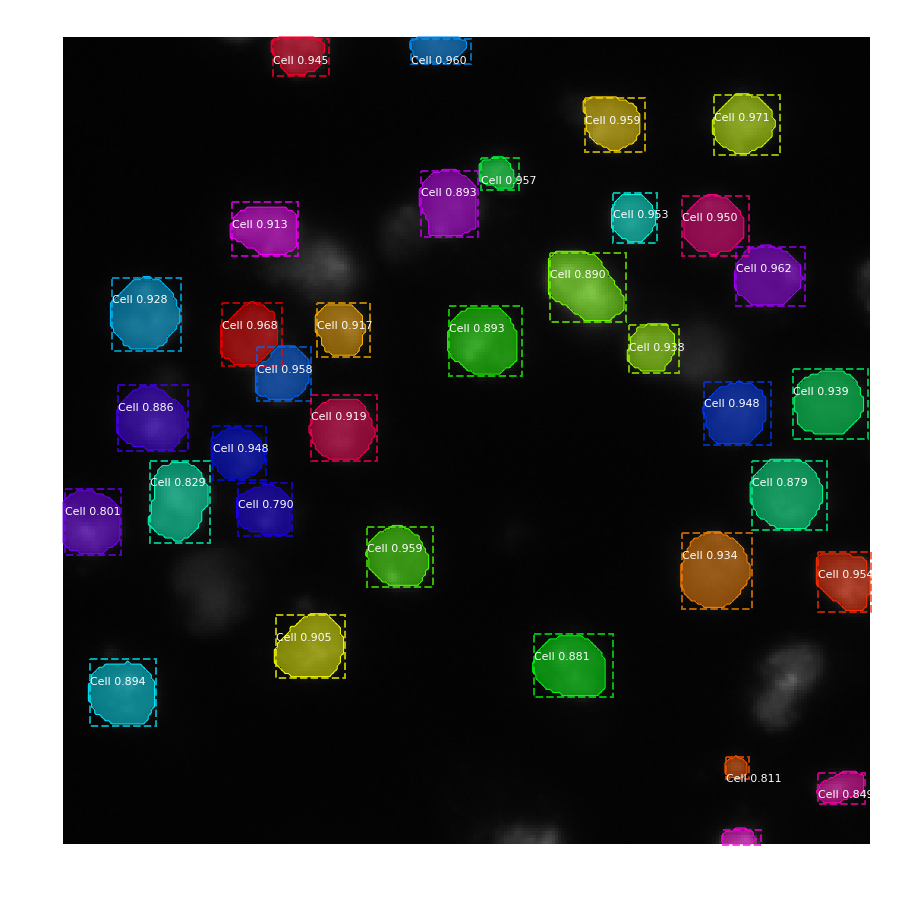

time: 570 ms


In [4]:
# Visualize results
for image, res in zip(images, results):
    boxes, class_ids, scores, masks = res
    visualize.display_instances(image, boxes, masks, class_ids, config.CLASS_NAMES, scores)
    plt.show()